## Create Milo object for cross-species comparison

In [1]:
suppressPackageStartupMessages(
{library(SingleCellExperiment)
library(biomaRt)
library(data.table)
library(scater)
library(BiocParallel)
library(scran)
library(miloR)
}
)

In [2]:
# if (!require("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")

# BiocManager::install("miloR")

### 1. Load RDS object 

In [3]:
mouse_dir <- "/nfs/team292/vl6/FetalReproductiveTract/"

In [4]:
sce <- readRDS(paste0(mouse_dir, "mouse_genital_tubercle_mpw_orthologs.rds"))
sce

class: SingleCellExperiment 
dim: 2556 60832 
metadata(0):
assays(3): X raw_counts log_normalised_counts
rownames(2556): Abcg1 Abtb2 ... Tnnt2 Tcea3
rowData names(43): gene_ids.0 feature_types.0 ...
  highly_variable_nbatches highly_variable_intersection
colnames(60832): GSM5324563_E14.5_male_genitalia_1_AAACCCAAGAAGGTAG
  GSM5324563_E14.5_male_genitalia_1_AAACCCAAGTCCCAAT ...
  GSM5324574_E18.5_female_genitalia_2_TTTGTTGTCATAGGCT
  GSM5324574_E18.5_female_genitalia_2_TTTGTTGTCATTTCCA
colData names(7): sample donor ... species celltype
reducedDimNames(3): PCA UMAP X_pca_harmony
mainExpName: NULL
altExpNames(0):

### 2. Format the SCE object with appropriate slots for raw and normalised counts

In [5]:
assay(sce, "counts") <- assay(sce, "raw_counts")
assay(sce, "logcounts") <- assay(sce, "log_normalised_counts")

In [6]:
sce

class: SingleCellExperiment 
dim: 2556 60832 
metadata(0):
assays(5): X raw_counts log_normalised_counts counts logcounts
rownames(2556): Abcg1 Abtb2 ... Tnnt2 Tcea3
rowData names(43): gene_ids.0 feature_types.0 ...
  highly_variable_nbatches highly_variable_intersection
colnames(60832): GSM5324563_E14.5_male_genitalia_1_AAACCCAAGAAGGTAG
  GSM5324563_E14.5_male_genitalia_1_AAACCCAAGTCCCAAT ...
  GSM5324574_E18.5_female_genitalia_2_TTTGTTGTCATAGGCT
  GSM5324574_E18.5_female_genitalia_2_TTTGTTGTCATTTCCA
colData names(7): sample donor ... species celltype
reducedDimNames(3): PCA UMAP X_pca_harmony
mainExpName: NULL
altExpNames(0):

In [7]:
# Remove unnecessary assay slots 
assay(sce, "X") <- NULL
assay(sce, "raw_counts") <- NULL
assay(sce, "log_normalised_counts") <- NULL

### 5. Create Milo object on Harmony-corrected embedding

In [8]:
sce_milo <- Milo(sce)

In [9]:
sce_milo

class: Milo 
dim: 2556 60832 
metadata(0):
assays(2): counts logcounts
rownames(2556): Abcg1 Abtb2 ... Tnnt2 Tcea3
rowData names(43): gene_ids.0 feature_types.0 ...
  highly_variable_nbatches highly_variable_intersection
colnames(60832): GSM5324563_E14.5_male_genitalia_1_AAACCCAAGAAGGTAG
  GSM5324563_E14.5_male_genitalia_1_AAACCCAAGTCCCAAT ...
  GSM5324574_E18.5_female_genitalia_2_TTTGTTGTCATAGGCT
  GSM5324574_E18.5_female_genitalia_2_TTTGTTGTCATTTCCA
colData names(7): sample donor ... species celltype
reducedDimNames(3): PCA UMAP X_pca_harmony
mainExpName: NULL
altExpNames(0):
nhoods dimensions(2): 1 1
nhoodCounts dimensions(2): 1 1
nhoodDistances dimension(1): 0
graph names(0):
nhoodIndex names(1): 0
nhoodExpression dimension(2): 1 1
nhoodReducedDim names(0):
nhoodGraph names(0):
nhoodAdjacency dimension(2): 1 1

In [10]:
k_neigh <- 15
n_comp <- 25
prop_indexCell <- 0.05

In [11]:
sce_milo <- buildGraph(sce_milo, k=k_neigh, d=n_comp, reduced.dim="X_pca_harmony", BPPARAM=MulticoreParam(7))

Constructing kNN graph with k:15



In [12]:
sce_milo <- makeNhoods(sce_milo, prop=prop_indexCell, k=k_neigh, d=n_comp, refined=TRUE, reduced_dims="X_pca_harmony")

Checking valid object



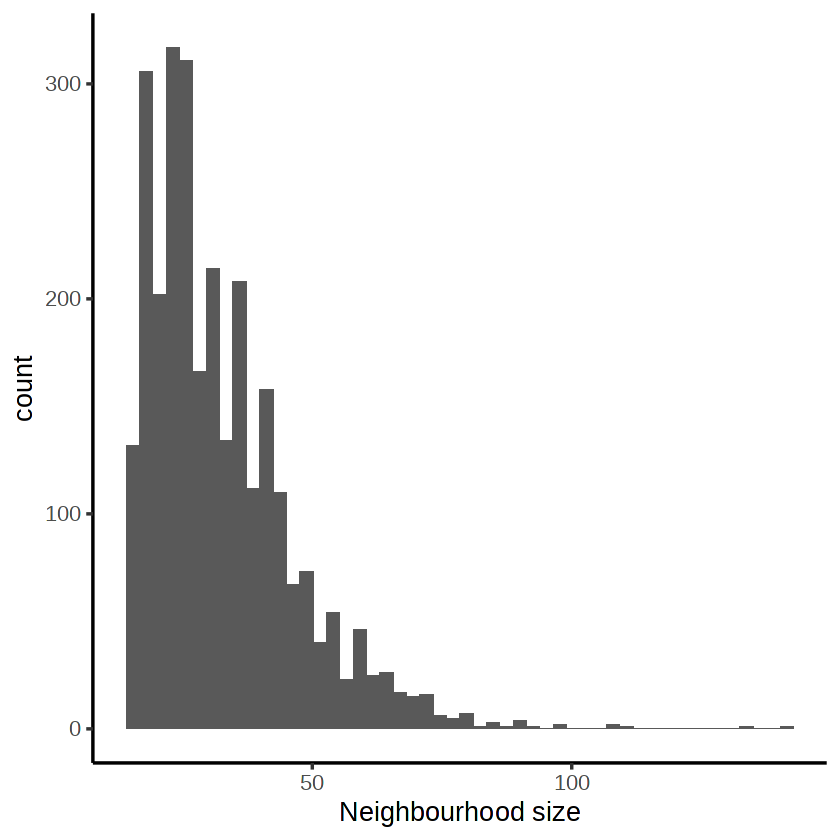

In [13]:
plotNhoodSizeHist(sce_milo)

In [14]:
sce_milo <- buildNhoodGraph(sce_milo)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


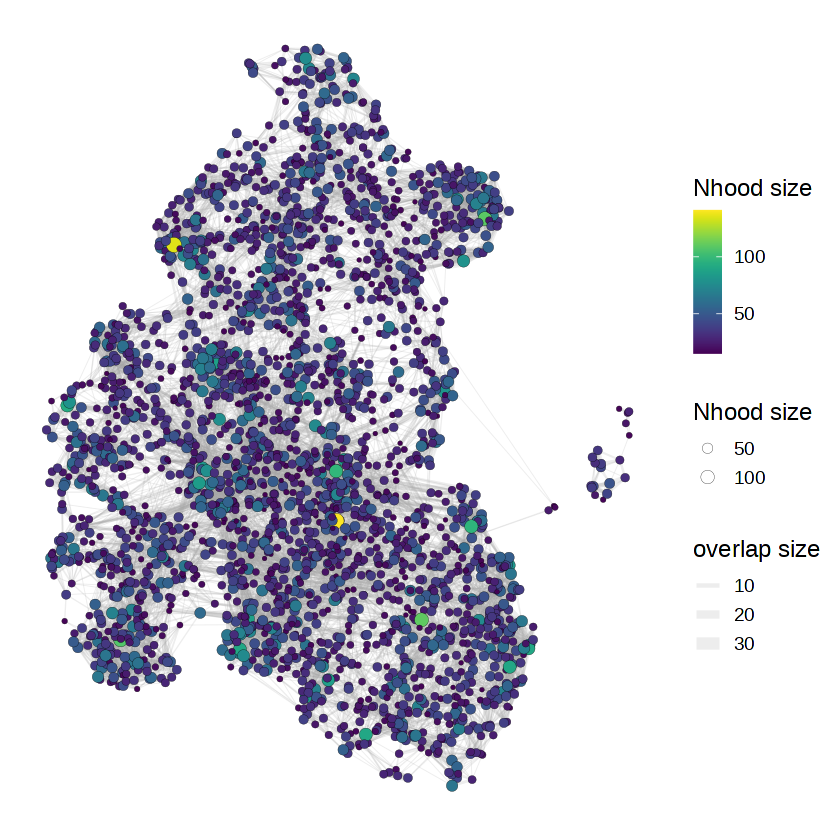

In [15]:
p3 <- plotNhoodGraph(sce_milo, size_range=c(1,4), node_stroke=0.1, layout="UMAP") + 
    viridis::scale_fill_viridis(name = "Nhood size", option = "viridis", direction = 1) 
plot(p3)

### 6. Save Milo object

In [16]:
saveRDS(sce_milo, paste0(mouse_dir, "mouse_genital_tubercle_mpw_milo_15knn.rds"))

In [17]:
mouse_dir

[1] "/nfs/team292/vl6/FetalReproductiveTract/"

In [18]:
prova <- as.data.frame(as.matrix(nhoods(sce_milo)))

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.3 GiB”


In [19]:
rownames(prova) <- colnames(sce_milo)

In [20]:
head(prova)

,30942,33368,32251,39552,2159,58182,2994,42058,50927,7969,⋯,7130,57929,12772,19038,5247,58241,52388,9332,41698,35950
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGAAGGTAG,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGTCCCAAT,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
GSM5324563_E14.5_male_genitalia_1_AAACCCAAGTTTCAGC,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
GSM5324563_E14.5_male_genitalia_1_AAACCCACAATGGCAG,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
GSM5324563_E14.5_male_genitalia_1_AAACCCAGTTTCCAAG,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
GSM5324563_E14.5_male_genitalia_1_AAACCCATCCGATGTA,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [21]:
write.csv(prova, paste0(mouse_dir, "mouse_genital_tubercle_mpw_milo_15knn.csv"))

In [22]:
dim(prova)

[1] 60832  2807